In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
corona = pd.read_csv("./data/covid_19_clean_complete.csv")
corona.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
corona.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

# 데이터 타입 수정하기
* `Date` 컬럼이 날짜 타입(`datetime`) 형식으로 안되어 있으니 바꿔주자

In [6]:
corona["Date"] = pd.to_datetime(corona["Date"])
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


# 코로나 국가별 최근 확진자, 사망자, 회복자 데이터 분석

최근 데이터 추출

In [8]:
# 최근 날짜 마스크 만들기
recent_mask = corona["Date"] == max(corona["Date"])


# 최근 데이터만 추출
corona_recent = corona[recent_mask]
corona_recent.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


## 국가별 합계 구하기


In [18]:
column_names = ["Confirmed", "Deaths", "Recovered"]
corona_recent_sum_by_country = corona_recent.groupby("WHO Region")[column_names].sum()
corona_recent_sum_by_country

,Confirmed,Deaths,Recovered
WHO Region,,,
Africa,723207,12223,440645
Americas,8839286,342732,4468616
Eastern Mediterranean,1490744,38339,1201400
Europe,3299523,211144,1993723
South-East Asia,1835297,41349,1156933
Western Pacific,292428,8249,206770


In [17]:
corona_recent_sum_by_country = corona_recent_sum_by_country.reset_index()
corona_recent_sum_by_country.head()

,WHO Region,Confirmed,Deaths,Recovered
0,Africa,723207,12223,440645
1,Americas,8839286,342732,4468616
2,Eastern Mediterranean,1490744,38339,1201400
3,Europe,3299523,211144,1993723
4,South-East Asia,1835297,41349,1156933


# 사망자가 많은 순으로 정렬

In [22]:
corona_death_sort = corona_recent_sum_by_country.sort_values(by="Deaths", ascending=False)
corona_death_sort

,Confirmed,Deaths,Recovered
WHO Region,,,
Americas,8839286,342732,4468616
Europe,3299523,211144,1993723
South-East Asia,1835297,41349,1156933
Eastern Mediterranean,1490744,38339,1201400
Africa,723207,12223,440645
Western Pacific,292428,8249,206770


In [23]:
corona_death_sort.style.background_gradient(cmap="Reds")

,Confirmed,Deaths,Recovered
WHO Region,,,
Americas,8839286,342732,4468616
Europe,3299523,211144,1993723
South-East Asia,1835297,41349,1156933
Eastern Mediterranean,1490744,38339,1201400
Africa,723207,12223,440645
Western Pacific,292428,8249,206770


# 시간에 따른 확진자, 사망자, 회복자

## 날짜별 확진자, 사망자, 회복자 합계 구하기
corona_date = corona

In [24]:
corona_date = corona.copy()

In [30]:
columns_name = ["Confirmed", "Deaths", "Recovered"]
corona_by_date = corona_date.groupby("Date")[column_names].sum()
corona_by_date

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-07-23,15510481,633506,8710969
2020-07-24,15791645,639650,8939705
2020-07-25,16047190,644517,9158743


## 시간에 따른 누적 확진자, 사망자, 회복자 시각화

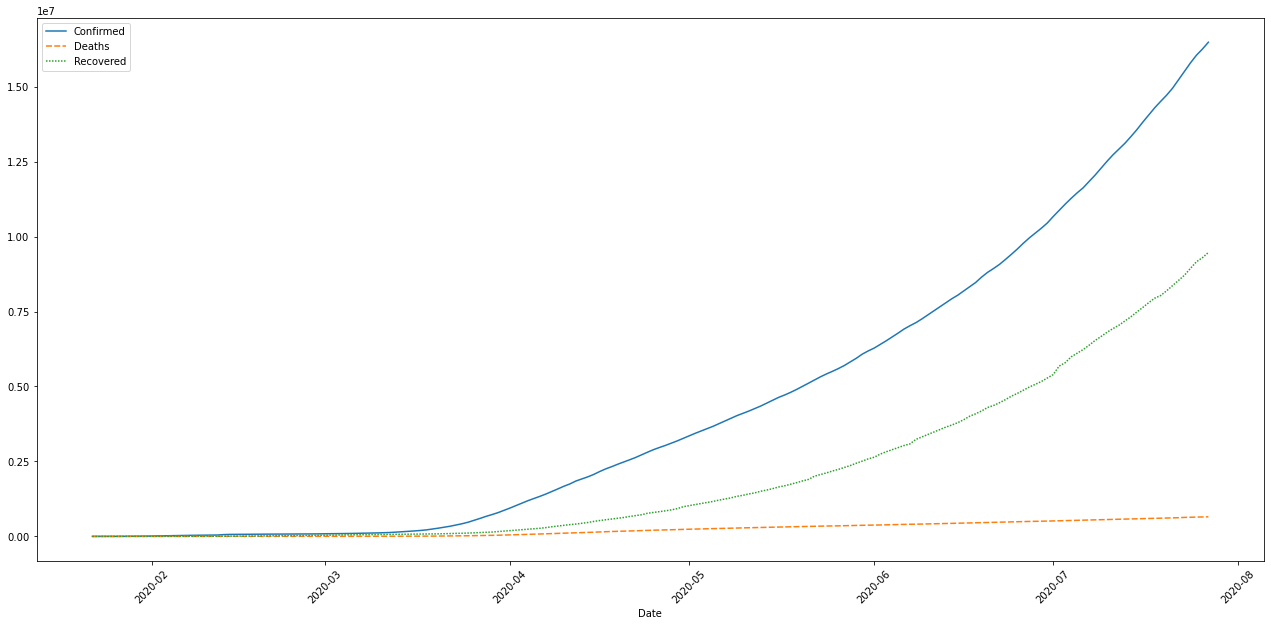

In [31]:
plt.figure(figsize=(22, 10))
plt.xticks(rotation=45)
sns.lineplot(data=corona_by_date)
plt.show()

In [32]:
import folium

f_map = folium.Map()
f_map

## folium으로 월드메르디앙 건물을 찍어보자

In [40]:
location = [37.5256967,126.888587]

f_map = folium.Map(location = location)
f_map

In [43]:
#### 확대

f_map = folium.Map(location = location, zoom_start=17)
f_map

In [52]:
f_map = folium.Map(location = location, zoom_start=17)

folium.Marker(
    location=location, #마커의 좌표
    popup="코딩지옥",
    icon=folium.Icon(color="red", icon="star")
).add_to(f_map)
f_map

### 원형 마커

In [53]:
f_map = folium.Map(location = location, zoom_start=17)

folium.CircleMarker(
    location,
    radius = 100, # 반지름
    color="#0D98BA", # 테두리 색상
    fill=True,
    fill_color="#00FFFF",
    popup="점심밥 먹는 곳"
).add_to(f_map)

f_map

전 세계 코로나 바이러스 감염 지도 표시하기

In [54]:
corona_recent.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [59]:
column_names = ["Country/Region", "Lat", "Long","Confirmed"]
corona_recent_data = corona_recent[column_names]
corona_recent_data

,Country/Region,Lat,Long,Confirmed
48807,Afghanistan,33.939110,67.709953,36263
48808,Albania,41.153300,20.168300,4880
48809,Algeria,28.033900,1.659600,27973
48810,Andorra,42.506300,1.521800,907
48811,Angola,-11.202700,17.873900,950
...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,865
49064,Yemen,15.552727,48.516388,1691
49065,Comoros,-11.645500,43.333300,354
49066,Tajikistan,38.861000,71.276100,7235


### 인덱스 재구성 - `reset_index`

In [60]:
corona_recent_data.reset_index() # 원본 인덱스를 컬럼으로 따로 빼준다

,index,Country/Region,Lat,Long,Confirmed
0,48807,Afghanistan,33.939110,67.709953,36263
1,48808,Albania,41.153300,20.168300,4880
2,48809,Algeria,28.033900,1.659600,27973
3,48810,Andorra,42.506300,1.521800,907
4,48811,Angola,-11.202700,17.873900,950
...,...,...,...,...,...
256,49063,Sao Tome and Principe,0.186400,6.613100,865
257,49064,Yemen,15.552727,48.516388,1691
258,49065,Comoros,-11.645500,43.333300,354
259,49066,Tajikistan,38.861000,71.276100,7235


In [62]:
corona_recent_data = corona_recent_data.reset_index(drop=True) # 원본 인덱스는 삭제하고 재구성
corona_recent_data.head()

,Country/Region,Lat,Long,Confirmed
0,Afghanistan,33.93911,67.709953,36263
1,Albania,41.15330,20.168300,4880
2,Algeria,28.03390,1.659600,27973
3,Andorra,42.50630,1.521800,907
4,Angola,-11.20270,17.873900,950


In [90]:
import numpy as np
f_map = folium.Map(location=[0, 0], zoom_start=3)

for idx in corona_recent_data.index:
    # 위경도
    lat = corona_recent_data["Lat"][idx]
    lng = corona_recent_data["Long"][idx]
    c_name = corona_recent_data["Country/Region"][idx]
    confirmed = corona_recent_data["Confirmed"][idx]
    
    folium.CircleMarker(
        location=[lat, lng],
        radius=np.log(confirmed) * 2,
        popup=f"{c_name}/{confirmed}☣️",
        color="red",
        fill=True,
        fill_color="red"
    ).add_to(f_map)
    

f_map

In [91]:
import numpy as np
f_map = folium.Map(location=[0, 0], zoom_start=3)

idx = corona_recent_data.index
    # 위경도
lat = corona_recent_data["Lat"][idx]
lng = corona_recent_data["Long"][idx]
c_name = corona_recent_data["Country/Region"][idx]
confirmed = corona_recent_data["Confirmed"][idx]
    
folium.CircleMarker(
        location=[lat, lng],
        radius=np.log(confirmed) * 2,
        popup=f"{c_name}/{confirmed}☣️",
        color="red",
        fill=True,
        fill_color="red"
    ).add_to(f_map)
f_map

ValueError: Location should consist of two numerical values, but 0      33.939110
1      41.153300
2      28.033900
3      42.506300
4     -11.202700
         ...    
256     0.186400
257    15.552727
258   -11.645500
259    38.861000
260   -29.610000
Name: Lat, Length: 261, dtype: float64 of type <class 'pandas.core.series.Series'> is not convertible to float.